# TODAY'S 02-02-21. Day 17. Lab 1 | Feature Extraction & Lab 2  | Data cleaning and wrangling

## BELOW (scroll down)

### YESTERDAY'S 01-02-21. Day 16. Lab 1 | Cleaning numerical data
For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

Instructions:
Q1) Import the necessary libraries.

Q2) Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

Q3) First look at its main features (head, shape, info).

Q4) Rename the columns so they follow the PE8 (snake case).

Q5) Change effective to date column to datetime format.

Q6) Check NaN values per column.

Q7) Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

Q8) For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

Q9) Get categorical features.

Q10) What should we do with the customer_id column?

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

import datetime

In [2]:
#Q1) Import the necessary libraries.

#Q2) Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

customer_df = pd.read_csv('lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv') 


### Q3) First look at its main features (head, shape, info)

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Q4) Rename the columns so they follow the PE8 (snake case).
- lowercase & remove spaces

In [7]:
customer_df.columns = customer_df.columns.str.lower()
customer_df.head()

,customer,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,marital status,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
customer_df.columns.values

array(['customer', 'state', 'customer_lifetime_value', 'response',
       'coverage', 'education', 'effective_to_date', 'employmentstatus',
       'gender', 'income', 'location_code', 'marital_status',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class',
       'vehicle_size'], dtype=object)

In [10]:
#Q5) Change effective to date column to datetime format.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors='coerce')
customer_df['effective_to_date'][0].strftime(format='%d/%m/%Y')

'24/02/2011'

In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [12]:
### Q6) Check NaN values per column.
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [13]:
customer_df['state'].unique() 

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [14]:
customer_df['customer_lifetime_value'].unique() 

array([ 2763.519279,  6979.535903, 12887.43165 , ...,  8163.890428,
        7524.442436,  2611.836866])

In [15]:
customer_df['income'].unique() 

array([56274,     0, 48767, ..., 66367, 71941, 21941], dtype=int64)

### Q10) What should we do with the customer_id column?

In [16]:
customer_df = customer_df.rename(columns={"customer": "customer_id"})
customer_df.head(5)

,customer_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [17]:
customer_df.set_index(customer_df["customer_id"], inplace = True)
customer_df.drop('customer_id', axis = 1, inplace = True)

In [18]:
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Q7) Define a function that differentiates between continuous and discrete variables.
#Hint: A number of unique values might be useful. Store continuous data into a continuous variable
#and do the same for discrete and categorical.

### Q8) For the categorical data, check if there is some kind of text in a variable so we would need to clean it.
#Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [19]:
categorical = pd.DataFrame()
discrete_df = pd.DataFrame()
continuous_df = pd.DataFrame()

def diff_concr_discr_cat(x):
    for i in x:
        if customer_df[i].dtype == 'object':
            categorical[i] = customer_df[i]
        elif customer_df[i].dtype == 'int64':
            discrete_df[i] = customer_df[i]
        elif customer_df[i].dtype == 'float64':
            continuous_df[i] = customer_df[i]

diff_concr_discr_cat(list(customer_df.columns))
customer_df['income'] = customer_df['income'].astype(float)

In [20]:
#customer_df['income'] = customer_df['income'].astype(float)#
#categorical = customer_df.select_dtypes(include = np.object#)
#continuous_df = customer_df.select_dtypes(include = np.floa#t64)
#discrete_df = customer_df.select_dtypes(include = np.int64)

In [21]:
numerical = customer_df.select_dtypes(include = np.number)
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   float64
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   total_claim_amount             9134 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 642.2+ KB


In [22]:
continuous_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_lifetime_value  9134 non-null   float64
 1   total_claim_amount       9134 non-null   float64
dtypes: float64(2)
memory usage: 214.1+ KB


In [23]:
discrete_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   income                         9134 non-null   int64
 1   monthly_premium_auto           9134 non-null   int64
 2   months_since_last_claim        9134 non-null   int64
 3   months_since_policy_inception  9134 non-null   int64
 4   number_of_open_complaints      9134 non-null   int64
 5   number_of_policies             9134 non-null   int64
dtypes: int64(6)
memory usage: 499.5+ KB


In [24]:
discrete_df.value_counts()

income  monthly_premium_auto  months_since_last_claim  months_since_policy_inception  number_of_open_complaints  number_of_policies
13663   97                    1                        66                             0                          2                     6
14030   72                    11                       3                              0                          1                     6
0       73                    17                       44                             0                          7                     6
92766   71                    17                       15                             0                          2                     6
0       73                    18                       45                             0                          5                     6
                                                                                                                                      ..
52389   72                    29              

In [25]:
#discrete_df.unique()

### Q9) Get categorical features.

In [26]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             9134 non-null   object
 1   response          9134 non-null   object
 2   coverage          9134 non-null   object
 3   education         9134 non-null   object
 4   employmentstatus  9134 non-null   object
 5   gender            9134 non-null   object
 6   location_code     9134 non-null   object
 7   marital_status    9134 non-null   object
 8   policy_type       9134 non-null   object
 9   policy            9134 non-null   object
 10  renew_offer_type  9134 non-null   object
 11  sales_channel     9134 non-null   object
 12  vehicle_class     9134 non-null   object
 13  vehicle_size      9134 non-null   object
dtypes: object(14)
memory usage: 1.0+ MB


def continuous_discrete(x):
    if x in X_num:
        dtypes = int64
        return continuous
    elif x in X_num:
        dtypes = float64:
        return continuous
def sqrt_transfom_clean_(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

 ----

# Lab 2 | Cleaning categorical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder. In this lab we will explore categorical data.

Instructions:

Q1) Import the necessary libraries if you are starting a new notebook.

Q2) Load the continuous and discrete variables into continuous_df and discrete_df variables.

Q3) Plot a correlation matrix, what can you see?

Q4) Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

Q5) What can you see in the plots?

Q6) Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

Q7) Have you found outliers? If you have, what should we do with them?

Q8) Check nan values per column.

Q9) Define a function that differentiate between continuous and discrete variables. Hint: Number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
Get categorical features.
What should we do with the customer id column?

In [27]:
import scipy.stats as stats
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

### Q3) Plot a correlation matrix, what can you see?

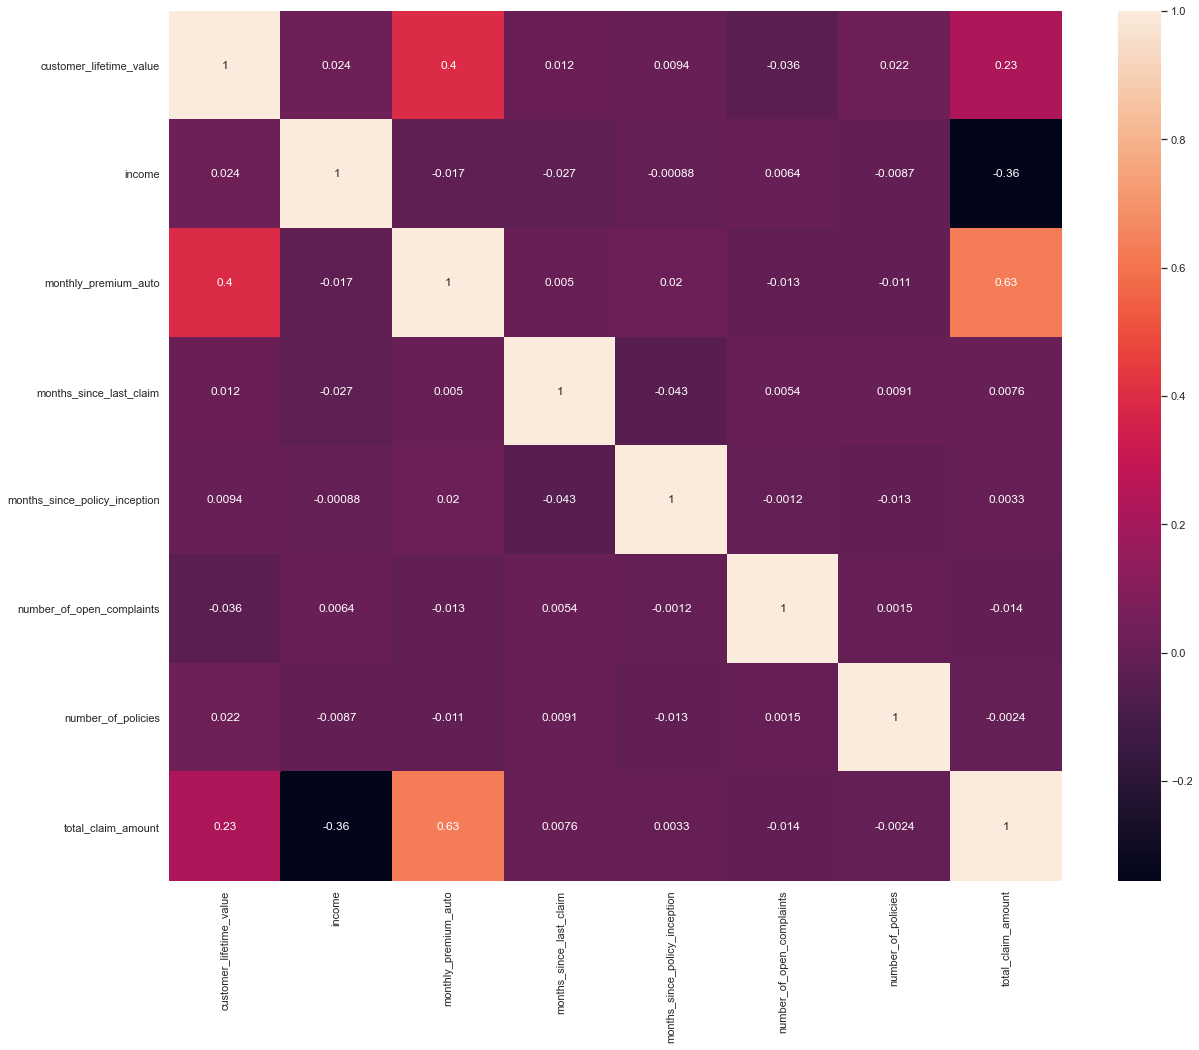

In [28]:
corr_matrix=numerical.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

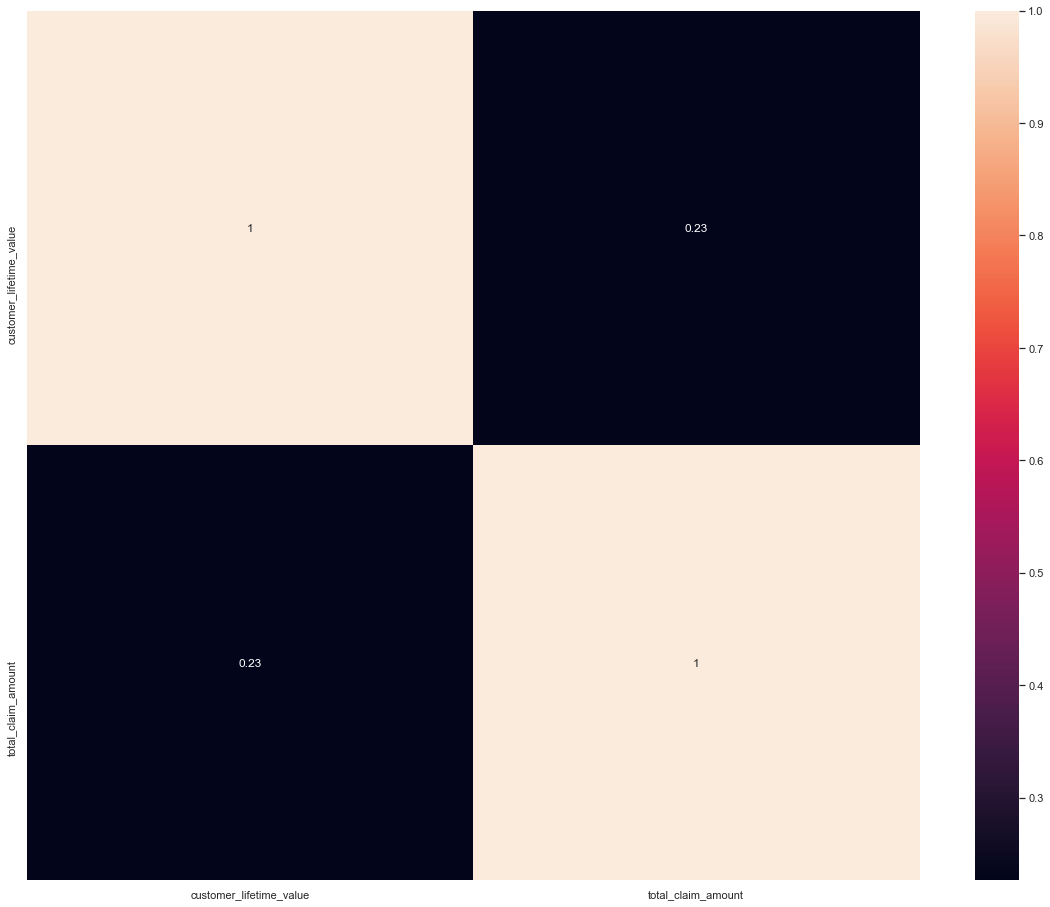

In [29]:
corr_matrix=continuous_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

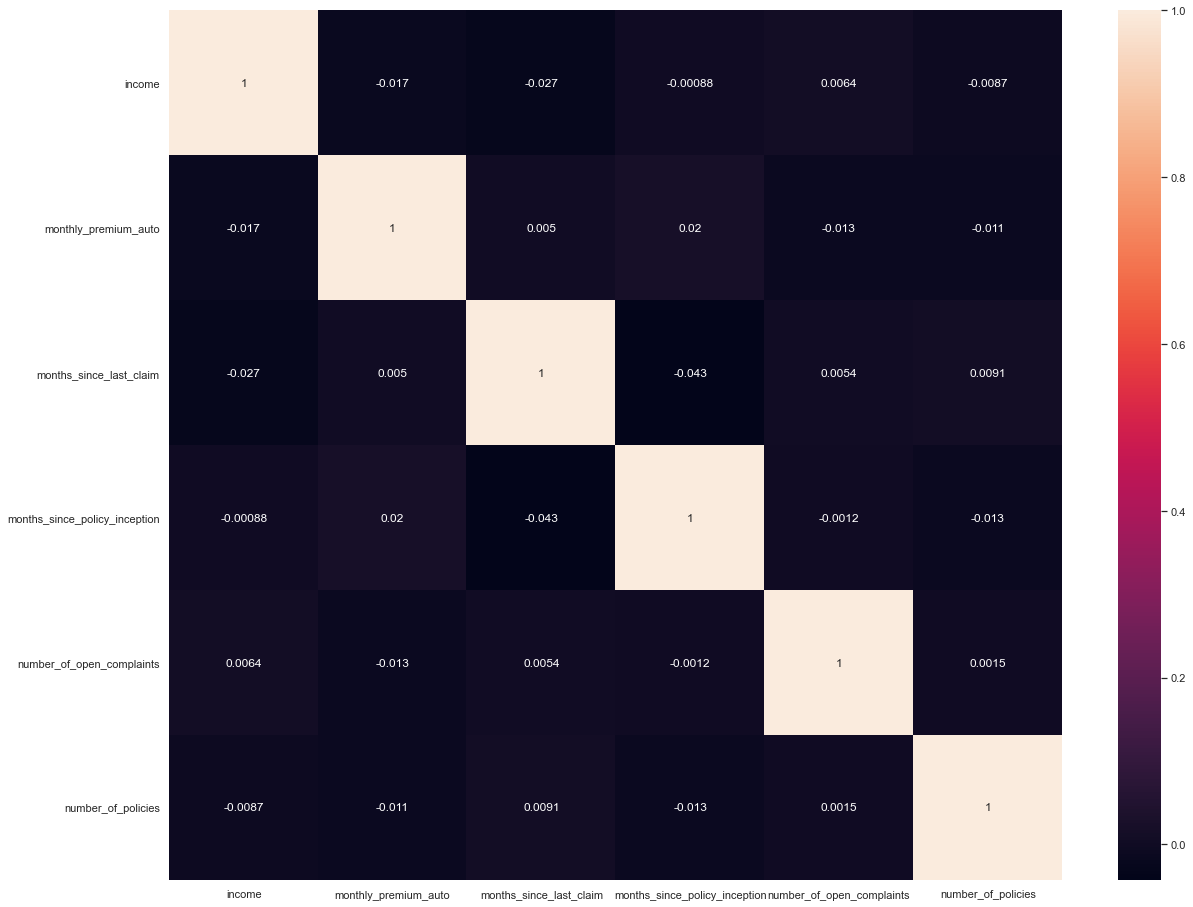

In [30]:
corr_matrix=discrete_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(20, 16))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

corr_matrix(numerical)
corr_matrix([continuous_df])

In [31]:
def cont_plot(x):
    for i in range(3):
        sns.distplot(continuous_df.iloc[:,i])
        plt.show()
    #for col in list(x.columns)

### Q4) Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

In [32]:
# continuous variables = distplot

def distplot_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cols=list(df.columns)
    
    for col in cols:
        sns.distplot(df[col])
        plt.show()

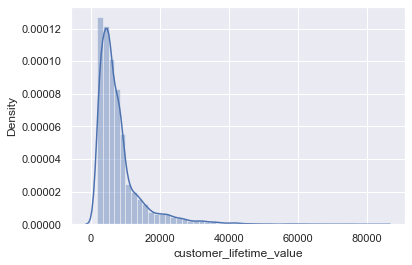

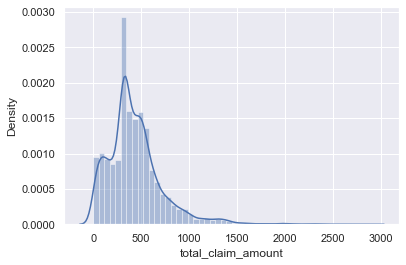

In [33]:
distplot_df(continuous_df)

In [34]:
# discrete variables = histplot

def histplot_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cols=list(df.columns)
    
    for col in cols:
        sns.histplot(df[col])
        plt.show()

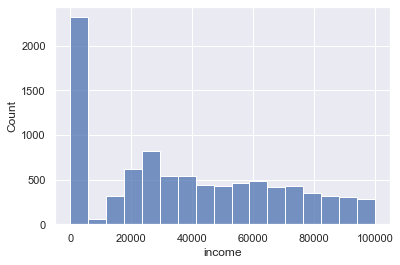

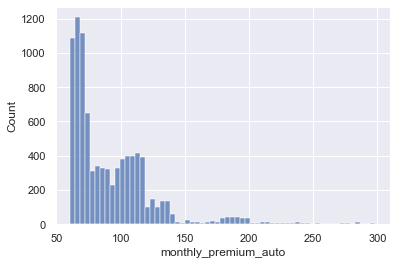

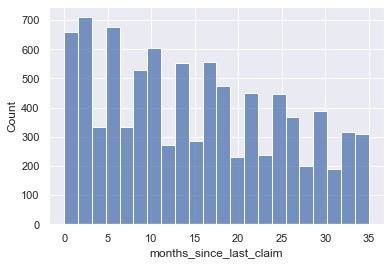

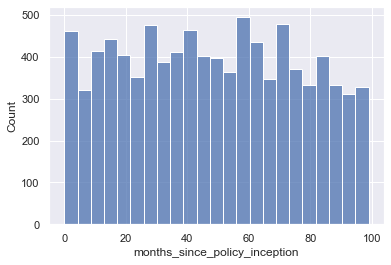

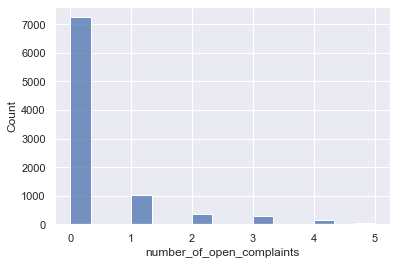

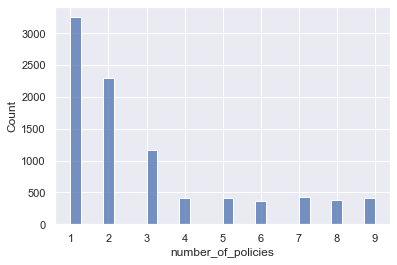

In [35]:
histplot_df(discrete_df)

Q5) What can you see in the plots?
- scewness of continuous
- from discrete you can easily identify the grouped values


## Q6) Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

Q7) Have you found outliers? If you have, what should we do with them?


In [36]:
def boxplot_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cols=list(df.columns)
    
    for col in cols:
        sns.boxplot(df[col])
        plt.show()

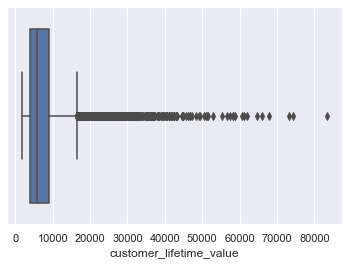

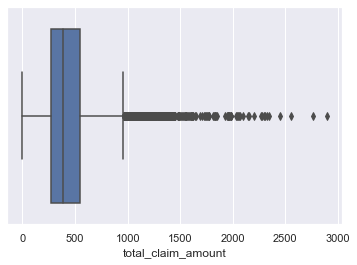

In [37]:
boxplot_df(continuous_df)

Q7) Have you found outliers? If you have, what should we do with them?
- Lots of outliers for customer lifetime value and total claim amount, so many that we didnt feel like they should be dropped
- Screwness > Log transformation

In [38]:
def log_transfom_clean_(x):
    if np.isfinite(x) and x!=0: # If the value is finite and != 0...
        return np.log(x)
    else:
        return np.NAN # We are returning NaNs so that we can replace them later

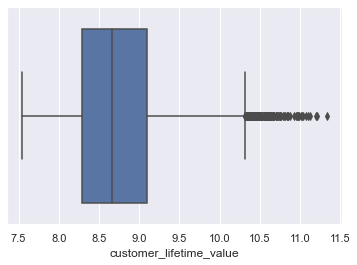

In [39]:
# Using the functions to check the distribution of transformed data

continuous_df['customer_lifetime_value'] = list(map(log_transfom_clean_, continuous_df['customer_lifetime_value']))



continuous_df['customer_lifetime_value'] = continuous_df['customer_lifetime_value'].fillna(np.mean(continuous_df['customer_lifetime_value']))
sns.boxplot(continuous_df['customer_lifetime_value'])
plt.show()


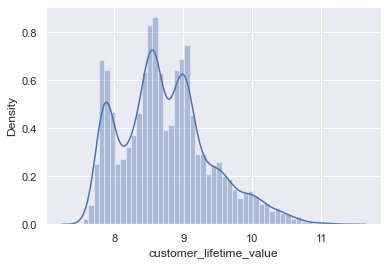

In [40]:
sns.distplot(continuous_df['customer_lifetime_value'])
plt.show()

### Q8) Check nan values per column

In [41]:
continuous_df['customer_lifetime_value'].unique() 

array([7.92426025, 8.8507377 , 9.46400782, ..., 9.0074761 , 8.92591199,
       7.86780903])

In [42]:
continuous_df['customer_lifetime_value'].isna().sum()

0

In [43]:
' 'in continuous_df['customer_lifetime_value']

False

### Q9) Define a function that differentiate between continuous and discrete variables. 
Hint: Number of unique values might be useful. 
Store continuous data into a continuous variable and do the same for discrete and categorical.
for the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

Get categorical features.

What should we do with the customer id column?

In [44]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [45]:
categorical.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

# Lab 1 & 2. 02/02/21  <<<<<<<<

# Lab 1. 02/02/21 | Feature extraction   ----------
For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
Open the categoricals variable we created before.
categoricals = data.select_dtypes(np.object)
categoricals.head()

Plot all the categorical variables with the proper plot. What can you see?

There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

Plot time variable. Can you extract something from it?

In [46]:
import matplotlib.pyplot as plt

In [47]:
categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [48]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Plot all the categorical variables with the proper plot. What can you see?

In [49]:
# CAT = Histplot

def histplot_df(df):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    cols=list(df.columns)
    
    for col in cols:
        sns.histplot(df[col])
        plt.show()

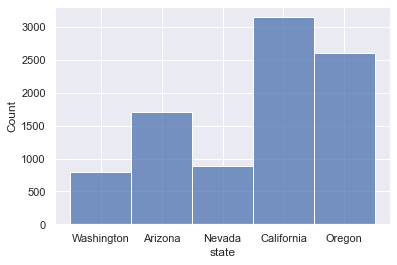

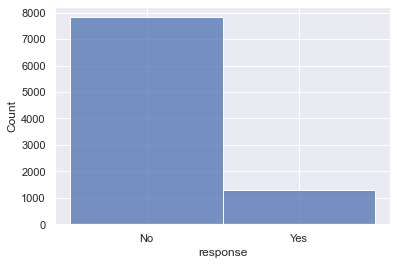

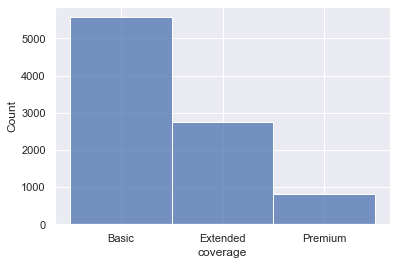

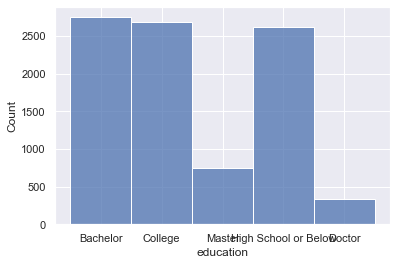

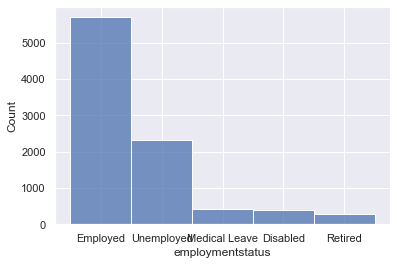

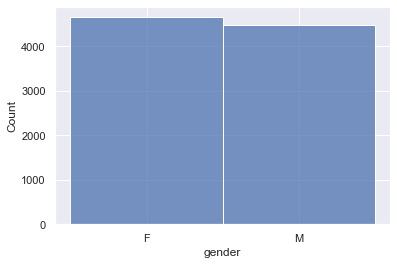

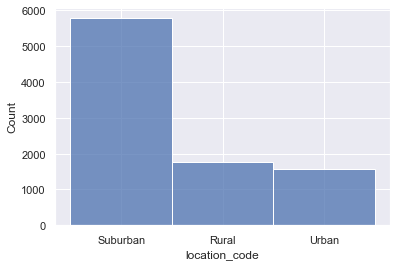

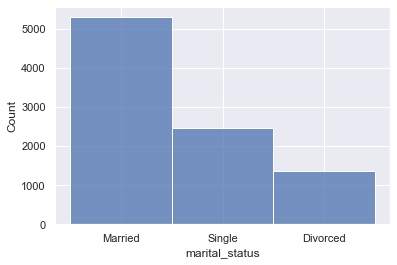

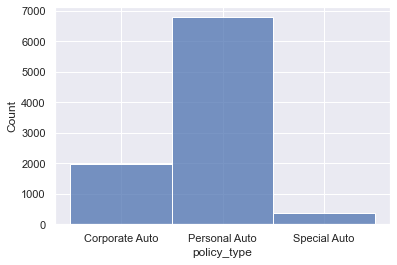

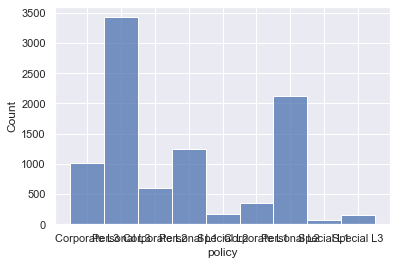

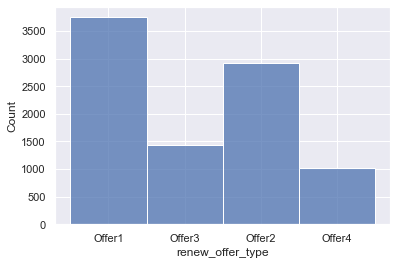

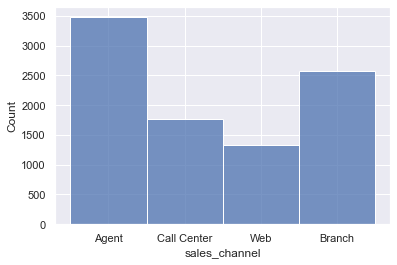

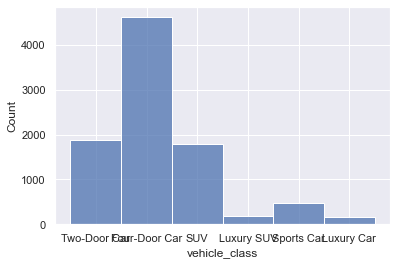

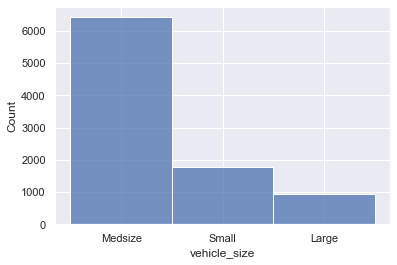

In [50]:
histplot_df(categorical)

#### There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

*** EDUCATION X EMPLOYMENT - related?

In [51]:
data_crosstabEdEmp = pd.crosstab(categorical['education'], categorical['employmentstatus'], margins = False)
data_crosstabEdEmp

employmentstatus,Disabled,Employed,Medical Leave,Retired,Unemployed
education,,,,,
Bachelor,121,1702,126,88,711
College,98,1664,145,102,672
Doctor,22,249,17,1,53
High School or Below,118,1528,115,72,789
Master,46,555,29,19,92


In [52]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected_freq = chi2_contingency(data_crosstabEdEmp, correction=False)

print("The Chi2 value is: ",round(chi2,2))
print("The p-value is: ",p_value)
print("The number of degrees of freedom is: ",dof)
print("The expected frequencies are: ")
pd.DataFrame(expected_freq, columns=data_crosstabEdEmp.columns, index=data_crosstabEdEmp.index)

The Chi2 value is:  148.76
The p-value is:  1.3729369098070577e-23
The number of degrees of freedom is:  16
The expected frequencies are: 


employmentstatus,Disabled,Employed,Medical Leave,Retired,Unemployed
education,,,,,
Bachelor,121.845851,1714.265820,129.968907,84.840815,697.078607
College,118.875082,1672.469674,126.800088,82.772279,680.082877
Doctor,15.164222,213.347493,16.175170,10.558791,86.754325
High School or Below,116.259032,1635.664112,124.009634,80.950734,665.116488
Master,32.855813,462.252901,35.046201,22.877381,187.967703


*** EMPLOYMENT x GENDER - sexism?

In [53]:
data_crosstabGenEmp = pd.crosstab(categorical['gender'], categorical['employmentstatus'], margins = False)
data_crosstabGenEmp

employmentstatus,Disabled,Employed,Medical Leave,Retired,Unemployed
gender,,,,,
F,244,2937,214,128,1135
M,161,2761,218,154,1182


In [54]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected_freq = chi2_contingency(data_crosstabGenEmp, correction=False)

print("The Chi2 value is: ",round(chi2,2))
print("The p-value is: ",p_value)
print("The number of degrees of freedom is: ",dof)
print("The expected frequencies are: ")
pd.DataFrame(expected_freq, columns=data_crosstabGenEmp.columns, index=data_crosstabGenEmp.index)

The Chi2 value is:  22.22
The p-value is:  0.00018151136449675047
The number of degrees of freedom is:  4
The expected frequencies are: 


employmentstatus,Disabled,Employed,Medical Leave,Retired,Unemployed
gender,,,,,
F,206.534924,2905.7679,220.303919,143.809503,1181.583753
M,198.465076,2792.2321,211.696081,138.190497,1135.416247


## What we see: 

##### Plots:
that the majority of the cat data is ordinal


##### CH2

######### LOGIC: 
Let's use the usual confidence level of 95%.
Chi2 <-> Chi2_critical
if (Chi2 >= Chi2_critical):
    reject Ho
else:
    accept H0
***EDUCATION X EMPLOYMENT**
Chi 2 = 148.76 DOF = 16
The two-tailed P value is less than 0.05 (the complementary 5%) ch2. 148.76 > 26.30
148.76 > 26.30 (critical) = reject.
We reject the nul hypotheses columns education and employmentstatus are not related.
Decision: we can drop education as it has more columns



***EMPLOYMENT x GENDER - sexism?**
Chi 2 = 22.22 DOF = 4
The two-tailed P value is less than 0.05 (the complementary 5%) ch2. 22.22 > 	9.49
22.22 > 9.49 (critical) = reject.
We reject the nul hypotheses columns employment and gender are not related. = no sexism
Decision: we can drop employmentstatus

In [55]:
categorical.drop('education', axis = 1, inplace = True)

In [56]:
categorical.drop('employmentstatus', axis = 1, inplace = True)

In [57]:
def myplot(customer_df, exclude):
    
    for i in customer_df:
        
        if i != exclude:
        
            if len(customer_df[i].unique()) > 10:
            
                sns.distplot(customer_df[i], label = i)
                plt.show()
        
            else:
                sns.countplot(customer_df[i], label = i)
                plt.show()


### Effective_to_date

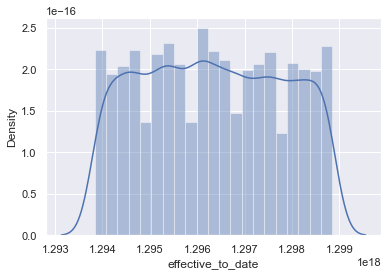

In [58]:
sns.distplot(customer_df['effective_to_date'])
plt.show()

# Lab 2. 02/02/21 | Data cleaning and wrangling  ------

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

Instructions
So far we have worked on EDA. This lab will focus on data cleaning and wrangling from everything we noticed before.

We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

Create a copy of the dataframe for the data wrangling.

Normalize the continuous variables. You can use any one method you want.

Encode the categorical variables

The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

Hint for Categorical Variables

You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
- One hot to state
- Ordinal to coverage
- Ordinal to employmentstatus
- Ordinal to location code
- One hot to marital status
- One hot to policy type
- One hot to policy
- One hot to renew offercustomer_df
- One hot to sales channel
- One hot vehicle class
- Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
 given that column "coverage" in the dataframe "data" has three categories:
 "basic", "extended", and "premium" and values are to be represented in the same order.

### COPY of DF

In [59]:
cc_customer_df = customer_df.copy()

In [60]:
cc_customer_df

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0.0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0.0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941.0,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604.0,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0.0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


### Normalize the continuous variables. You can use any one method you want.

In [61]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(continuous_df)
x_normalized = transformer.transform(continuous_df)
x_normalized

array([[0.02058823, 0.99978804],
       [0.00782213, 0.99996941],
       [0.01670459, 0.99986047],
       ...,
       [0.01138981, 0.99993513],
       [0.01291257, 0.99991663],
       [0.02128254, 0.9997735 ]])

### Encode the categorical variables

In [62]:
categorical.head()

,state,response,coverage,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,
BU79786,Washington,No,Basic,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [63]:
customer_df['effective_to_date'] #BEFORE

customer_id
BU79786   2011-02-24
QZ44356   2011-01-31
AI49188   2011-02-19
WW63253   2011-01-20
HB64268   2011-02-03
             ...    
LA72316   2011-02-10
PK87824   2011-02-12
TD14365   2011-02-06
UP19263   2011-02-03
Y167826   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

In [64]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].apply(lambda x:x.toordinal())
customer_df['effective_to_date'] #AFTER


customer_id
BU79786    734192
QZ44356    734168
AI49188    734187
WW63253    734157
HB64268    734171
            ...  
LA72316    734178
PK87824    734180
TD14365    734174
UP19263    734171
Y167826    734182
Name: effective_to_date, Length: 9134, dtype: int64

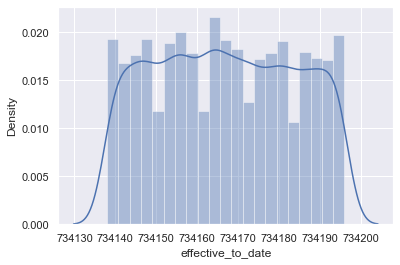

In [65]:
sns.distplot(customer_df['effective_to_date'])
plt.show()

In [66]:
categorical #BEFORE

,state,response,coverage,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer_id,,,,,,,,,,,,
BU79786,Washington,No,Basic,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [67]:
coverage_dict = {'Basic':0,'Extended':1,'Premium':2}
categorical['coverage'] = categorical.coverage.map(coverage_dict)

offer_dict = {'Offer1':1,'Offer2':2,'Offer3':3,'Offer4':4}
categorical['renew_offer_type'] = categorical.renew_offer_type.map(offer_dict)

vehicle_dict = {'Small':0,'Medsize':1,'Large':2 }
categorical['vehicle_size'] = categorical.vehicle_size.map(vehicle_dict)

In [68]:
#35 columns orginally came out so encorded cat > 32 colu

categorical = pd.get_dummies(categorical,drop_first=True)


In [69]:
categorical #AFTER

,coverage,renew_offer_type,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
QZ44356,1,3,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
AI49188,2,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
WW63253,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
HB64268,0,1,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,0,2,1,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
PK87824,1,1,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
TD14365,1,1,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


#### Double - check. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [70]:
categorical.info() #ALL NUMERICAL :)

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   coverage                    9134 non-null   int64
 1   renew_offer_type            9134 non-null   int64
 2   vehicle_size                9134 non-null   int64
 3   state_California            9134 non-null   uint8
 4   state_Nevada                9134 non-null   uint8
 5   state_Oregon                9134 non-null   uint8
 6   state_Washington            9134 non-null   uint8
 7   response_Yes                9134 non-null   uint8
 8   gender_M                    9134 non-null   uint8
 9   location_code_Suburban      9134 non-null   uint8
 10  location_code_Urban         9134 non-null   uint8
 11  marital_status_Married      9134 non-null   uint8
 12  marital_status_Single       9134 non-null   uint8
 13  policy_type_Personal Auto   9134 non-null   uint8
 14  poli